In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import sys
parent_path = str(Path().joinpath('..').resolve())
sys.path.append(parent_path)

In [3]:
from triple_agent.parsing.replay.get_parsed_replays import get_parsed_replays
from triple_agent.reports.generation.plot_specs import AxisProperties, DataQueryProperties
from triple_agent.constants.events import SCL5_DROPPED_PLAYERS, SCL5_DIVISIONS, select_scl5_regular_season
from triple_agent.classes.scl_set import sort_games_into_sets
from triple_agent.reports.specific.scl_set_scores import scl_set_scores_categorize
import matplotlib.pyplot as plt

In [4]:
scl5_replays = get_parsed_replays(select_scl5_regular_season)

In [5]:
scl5_sets = sort_games_into_sets(scl5_replays)

In [6]:
scores = [(6,6),(7,5),(7,4),(7,3),(7,2),(7,1),(7,0)]
compliant_scl5_sets = list(filter(lambda s: tuple(sorted(s.score, reverse=True)) in scores and s.division != 'Challenger', scl5_sets))

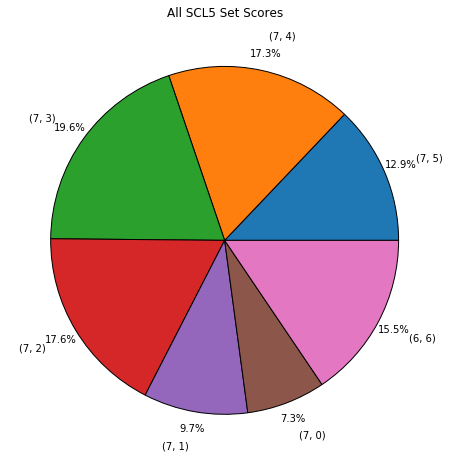

DataPlotProperties(frame=     (7, 5)  (7, 4)  (7, 3)  (7, 2)  (7, 1)  (7, 0)  (6, 6)
NaN      44      59      67      60      33      25      53, stacks_are_categories=True)

In [7]:
scl_set_scores_categorize(
    compliant_scl5_sets,
    axis_properties=AxisProperties(title='All SCL5 Set Scores')
)

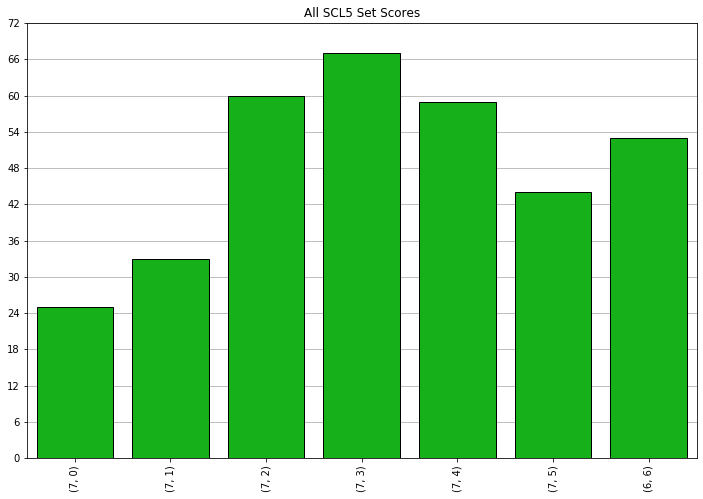

DataPlotProperties(frame=      7                       6
      0   1   2   3   4   5   6
NaN  25  33  60  67  59  44  53, stacks_are_categories=True)

In [8]:
scl_set_scores_categorize(
    compliant_scl5_sets,
    data_query=DataQueryProperties(primary_order=lambda name_series: (name_series[0][1], name_series[0][0])),
    axis_properties=AxisProperties(title='All SCL5 Set Scores', force_bar=True)
)

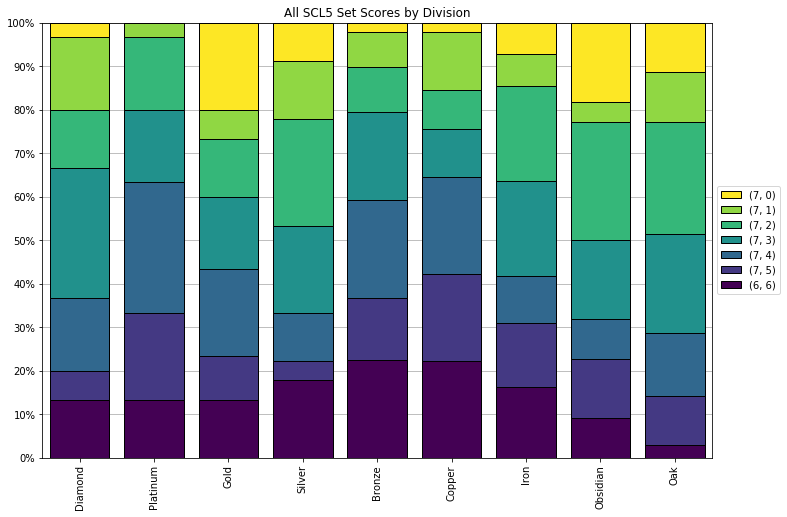

DataPlotProperties(frame=         Diamond  Platinum      Gold    Silver    Bronze    Copper      Iron  \
(7, 0)  0.033333  0.000000  0.200000  0.088889  0.020408  0.022222  0.072727   
(7, 1)  0.166667  0.033333  0.066667  0.133333  0.081633  0.133333  0.072727   
(7, 2)  0.133333  0.166667  0.133333  0.244444  0.102041  0.088889  0.218182   
(7, 3)  0.300000  0.166667  0.166667  0.200000  0.204082  0.111111  0.218182   
(7, 4)  0.166667  0.300000  0.200000  0.111111  0.224490  0.222222  0.109091   
(7, 5)  0.066667  0.200000  0.100000  0.044444  0.142857  0.200000  0.145455   
(6, 6)  0.133333  0.133333  0.133333  0.177778  0.224490  0.222222  0.163636   

        Obsidian       Oak  
(7, 0)  0.181818  0.114286  
(7, 1)  0.045455  0.114286  
(7, 2)  0.272727  0.257143  
(7, 3)  0.181818  0.228571  
(7, 4)  0.090909  0.142857  
(7, 5)  0.136364  0.114286  
(6, 6)  0.090909  0.028571  , stacks_are_categories=False)

In [9]:
cmap = plt.get_cmap('viridis', len(scores))

color_dict = {score:cmap(i) for i,score in enumerate(scores)}

scl_set_scores_categorize(
    compliant_scl5_sets,
    data_query=DataQueryProperties(
        groupby=lambda s: s.division,
        primary_order = scores,
        reverse_primary_order=True,
        secondary_order=lambda name_series: SCL5_DIVISIONS.index(name_series[0]),
        percent_normalized_data=True
    ),
    axis_properties=AxisProperties(
        title='All SCL5 Set Scores by Division',
        primary_color_dict = color_dict,
    )
)